# Mission Weather

> Demonstrates the following:
> 
> - Acquiring and ploting timseries data.

I was a missionary for the Church of Jesus Christ of Latter-day Saint from January 2009 through January 2011. I served in the Washington, Everett mission and was assigned to cities Mill Creek, Redmond, Arlington, Woodinville, and Lyndon.

For some time, I've wanted to document the weather that I experienced during those two years. SynopticPy will finally help me do that!

In [51]:
from synoptic import TimeSeries, Metadata, Precipitation
import seaborn as sns
from datetime import datetime, timedelta, date
import polars as pl

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
transfers = [
    dict(transfer=0, area="MTC", start=date(2009, 1, 7)),
    dict(transfer=1, area="Mill Creek", start=date(2009, 1, 27)),
    dict(transfer=2, area="Redmond", start=date(2009, 3, 10)),
    dict(transfer=3, area="Redmond", start=date(2009, 4, 21)),
    dict(transfer=4, area="Redmond", start=date(2009, 6, 2)),
    dict(transfer=5, area="Redmond", start=date(2009, 7, 14)),
    dict(transfer=6, area="Arlington", start=date(2009, 8, 25)),
    dict(transfer=7, area="Arlington", start=date(2009, 10, 6)),
    dict(transfer=8, area="Arlington", start=date(2009, 11, 17)),
    dict(transfer=9, area="Mill Creek", start=date(2009, 12, 29)),
    dict(transfer=10, area="Mill Creek", start=date(2010, 2, 9)),
    dict(transfer=11, area="Mill Creek", start=date(2010, 3, 23)),
    dict(transfer=12, area="Woodinville", start=date(2010, 5, 4)),
    dict(transfer=13, area="Woodinville", start=date(2010, 6, 15)),
    dict(transfer=14, area="Woodinville", start=date(2010, 7, 27)),
    dict(transfer=15, area="Woodinville", start=date(2010, 9, 7)),
    dict(transfer=16, area="Lynden", start=date(2010, 10, 19)),
    dict(transfer=17, area="Lynden", start=date(2010, 11, 30)),
    dict(transfer=18, area="Salt Lake Airport", start=date(2011, 1, 1)),
]

area_latlon = {
    "MTC": (40.25937949117472, -111.6441611325528),
    "Mill Creek": (47.88810699149626, -122.20819098866126),
    "Redmond": (47.676193032178304, -122.13056271908262),
    "Arlington": (48.17812726475638, -122.12727976113919),
    "Woodinville": (47.76041475669204, -122.14871653837506),
    "Lynden": (48.94188232236916, -122.46550386518274),
    "Salt Lake Airport": (40.785583863322486, -111.97428877123382),
}

transfers = (
    pl.DataFrame(transfers)
    .with_columns(
        end=pl.col("start").shift(-1),
        latlon=pl.col("area").replace_strict(area_latlon),
    )
    .with_columns(
        latitude=pl.col("latlon").list.first(),
        longitude=pl.col("latlon").list.last(),
    )
    .drop("latlon")
).with_columns(pl.col("end").fill_null(date(2011, 1, 2)))

transfers

transfer,area,start,end,latitude,longitude
i64,str,date,date,f64,f64
0,"""MTC""",2009-01-07,2009-01-27,40.259379,-111.644161
1,"""Mill Creek""",2009-01-27,2009-03-10,47.888107,-122.208191
2,"""Redmond""",2009-03-10,2009-04-21,47.676193,-122.130563
3,"""Redmond""",2009-04-21,2009-06-02,47.676193,-122.130563
4,"""Redmond""",2009-06-02,2009-07-14,47.676193,-122.130563
…,…,…,…,…,…
14,"""Woodinville""",2010-07-27,2010-09-07,47.760415,-122.148717
15,"""Woodinville""",2010-09-07,2010-10-19,47.760415,-122.148717
16,"""Lynden""",2010-10-19,2010-11-30,48.941882,-122.465504


In [3]:
for i in transfers.iter_rows(named=True):
    Metadata(
        obrange=(i["start"], i["end"]),
        radius=(i["latitude"], i["longitude"], 10),
        vars="air_temp,wind_speed,relative_humidity",
    ).df()

🚚💨 Speedy delivery from Synoptic's metadata service.
📦 Received data from 14 stations (11.53 seconds).
🚚💨 Speedy delivery from Synoptic's metadata service.
📦 Received data from 22 stations (0.59 seconds).
🚚💨 Speedy delivery from Synoptic's metadata service.
📦 Received data from 37 stations (0.62 seconds).
🚚💨 Speedy delivery from Synoptic's metadata service.
📦 Received data from 37 stations (0.50 seconds).
🚚💨 Speedy delivery from Synoptic's metadata service.
📦 Received data from 37 stations (0.51 seconds).
🚚💨 Speedy delivery from Synoptic's metadata service.
📦 Received data from 38 stations (0.52 seconds).
🚚💨 Speedy delivery from Synoptic's metadata service.
📦 Received data from 8 stations (0.51 seconds).
🚚💨 Speedy delivery from Synoptic's metadata service.
📦 Received data from 8 stations (0.50 seconds).
🚚💨 Speedy delivery from Synoptic's metadata service.
📦 Received data from 8 stations (0.51 seconds).
🚚💨 Speedy delivery from Synoptic's metadata service.
📦 Received data from 27 station

In [14]:
a

{'transfer': 2,
 'area': 'Redmond',
 'start': datetime.date(2009, 3, 10),
 'end': datetime.date(2009, 4, 21),
 'latitude': 47.676193032178304,
 'longitude': -122.13056271908262}

In [17]:
pl.date_range(start=a["start"], end=a["end"], interval="3w", eager=True)

literal
date
2009-03-10
2009-03-31
2009-04-21


In [20]:
a["start"] + timedelta(weeks=3)

datetime.date(2009, 3, 31)

In [26]:
transfers[0]["start"] + timedelta(weeks=3)

start
date
2009-01-28


In [27]:
half = (a["end"] - a["start"]) / 2

datetime.timedelta(days=21)

In [25]:
transfers[0]['start']+

transfer,area,start,end,latitude,longitude
i64,str,date,date,f64,f64
0,"""MTC""",2009-01-07,2009-01-27,40.259379,-111.644161


## Temperature and Dew Point

🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.66 seconds).
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.57 seconds).
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.66 seconds).
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.90 seconds).
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (1.33 seconds).
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (1.59 seconds).
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (1.10 seconds).
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (1.04 seconds).
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (1.05 seconds).
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data fr

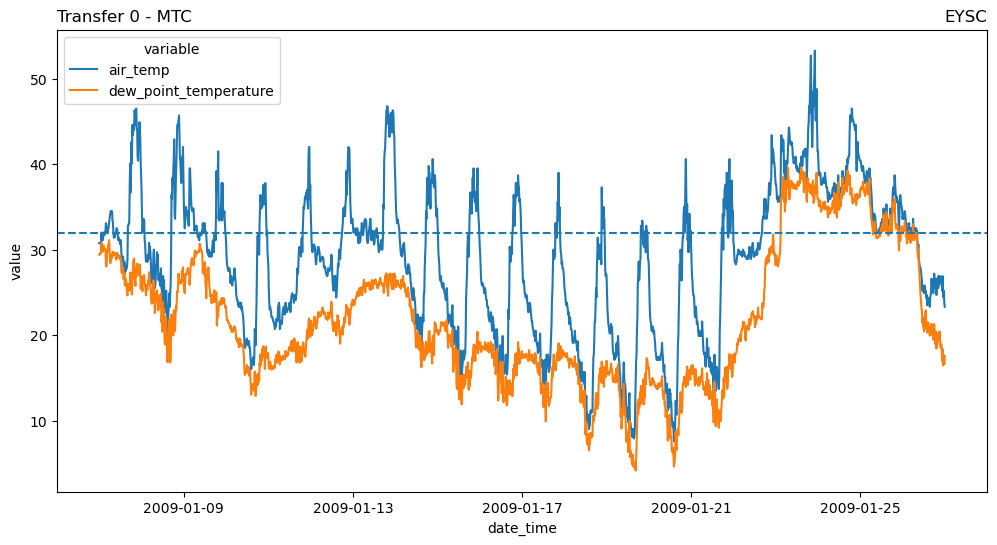

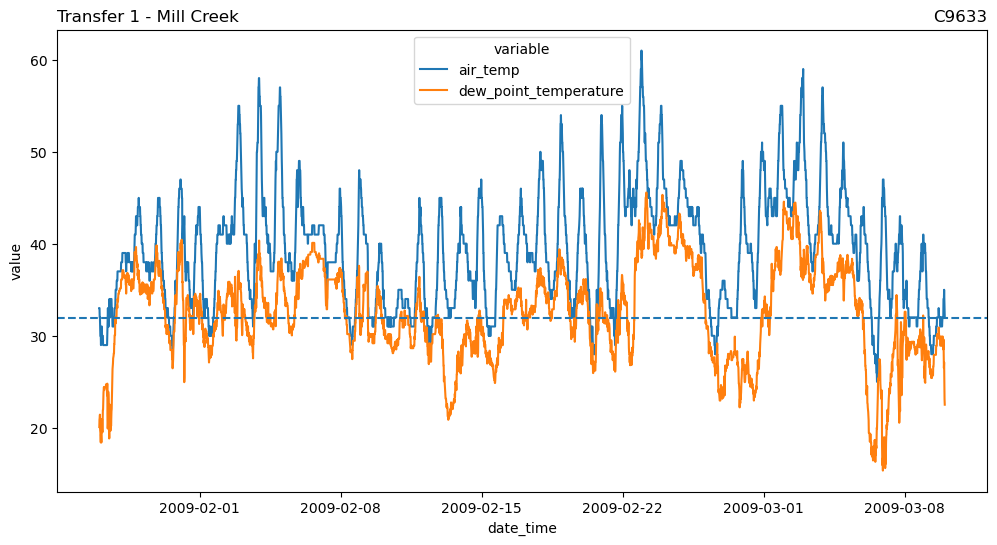

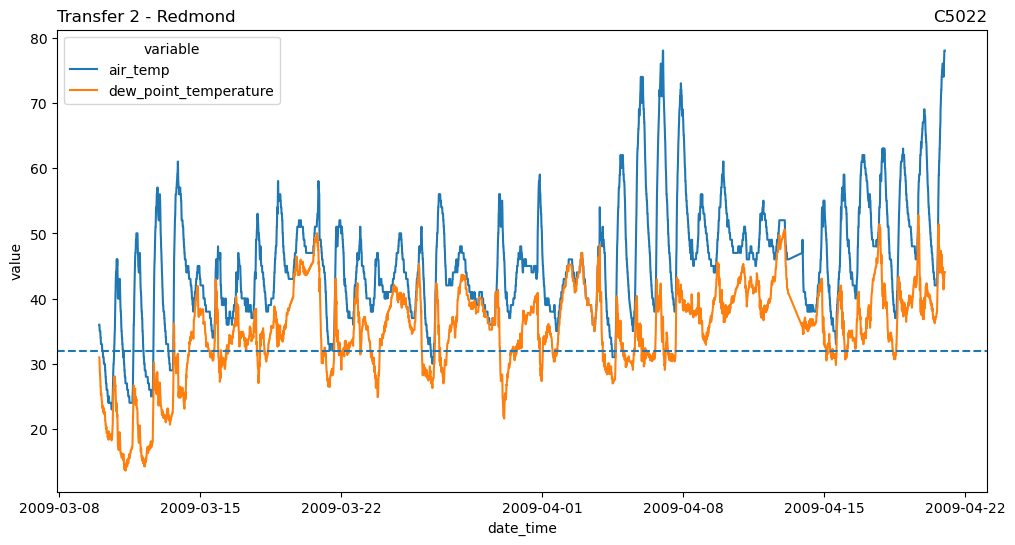

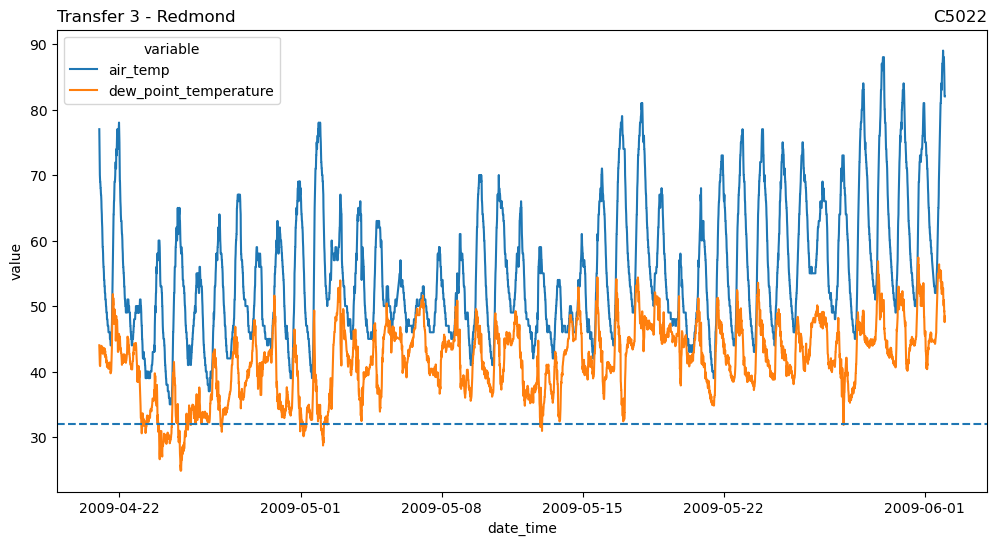

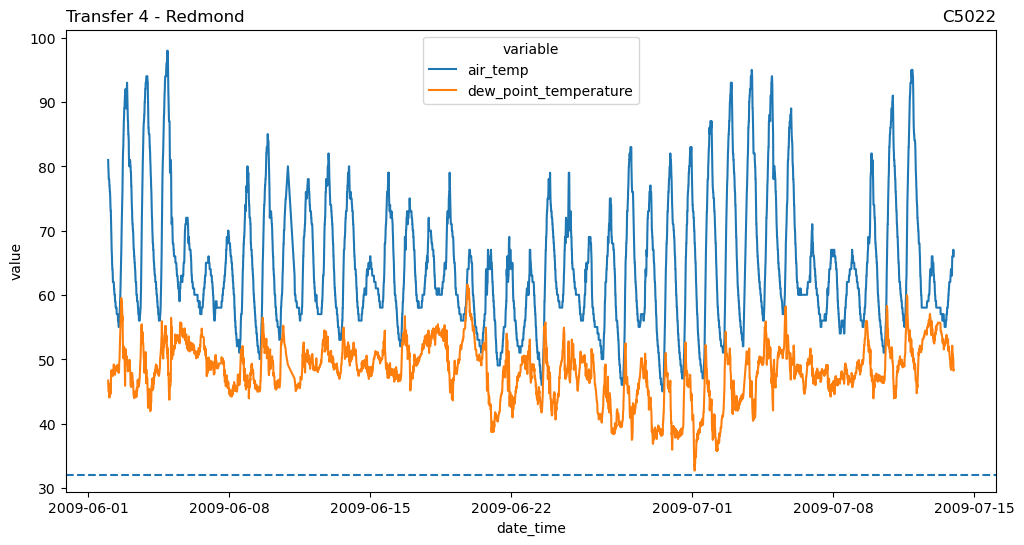

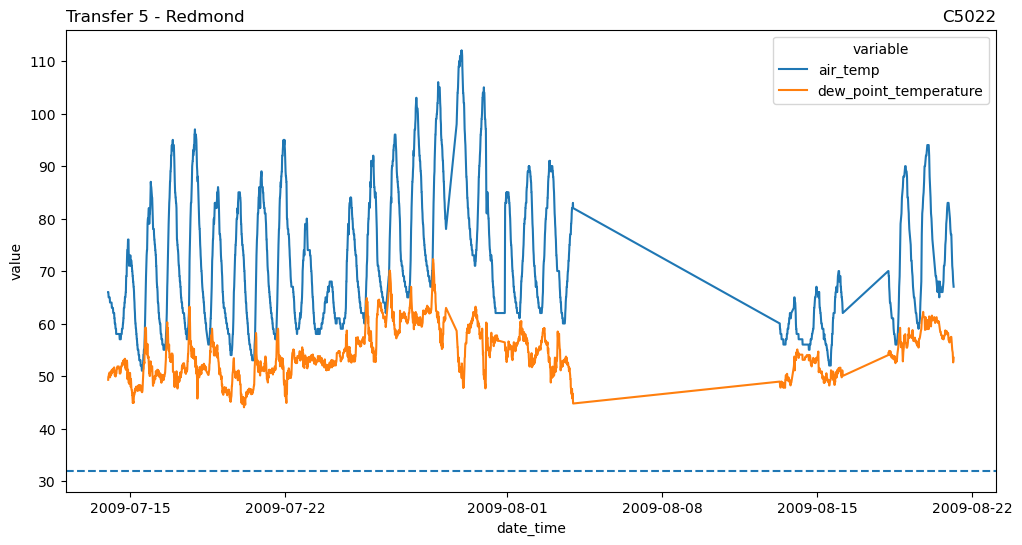

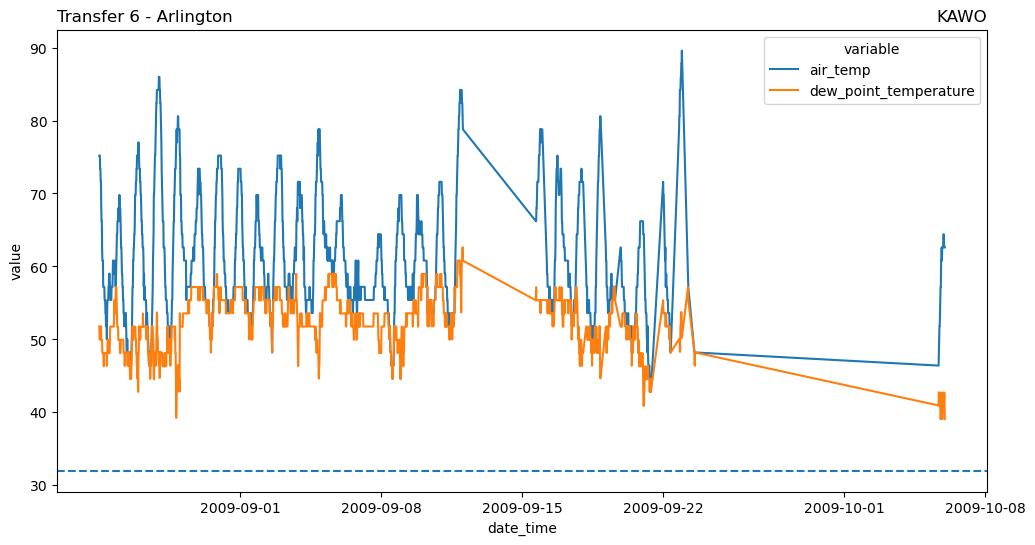

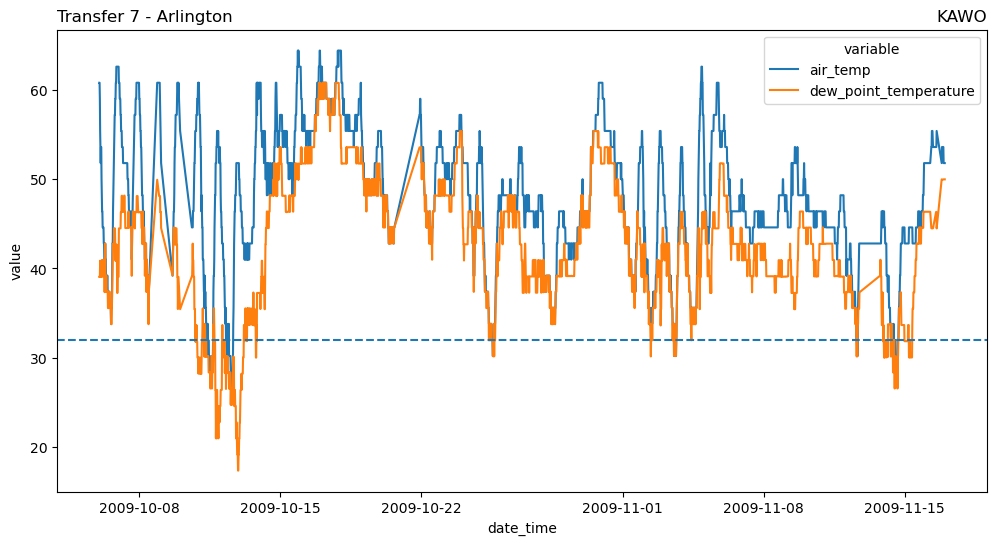

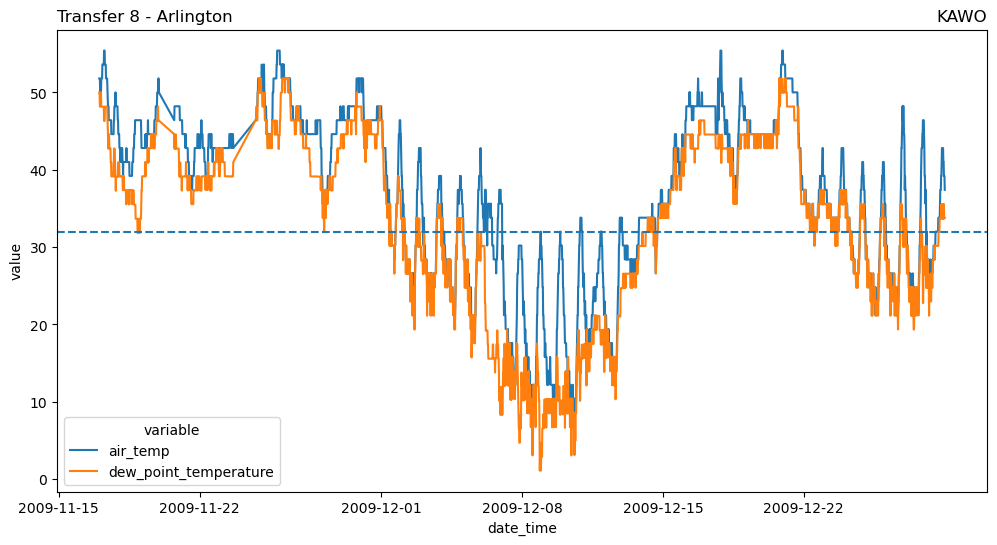

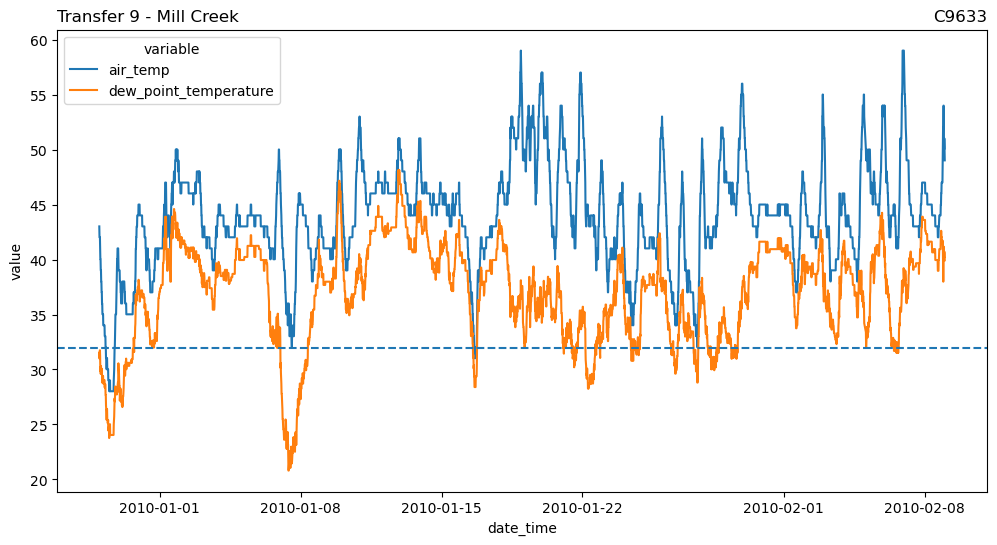

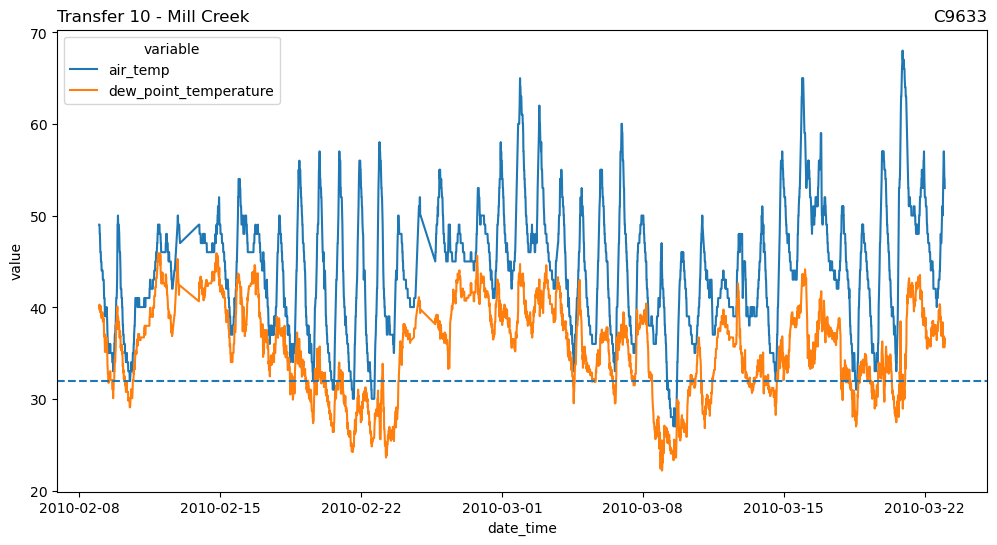

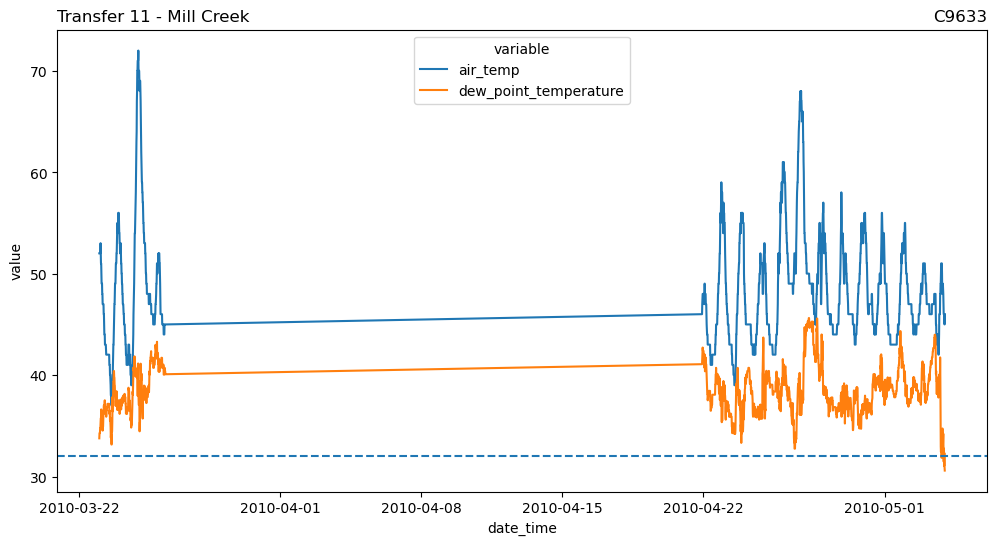

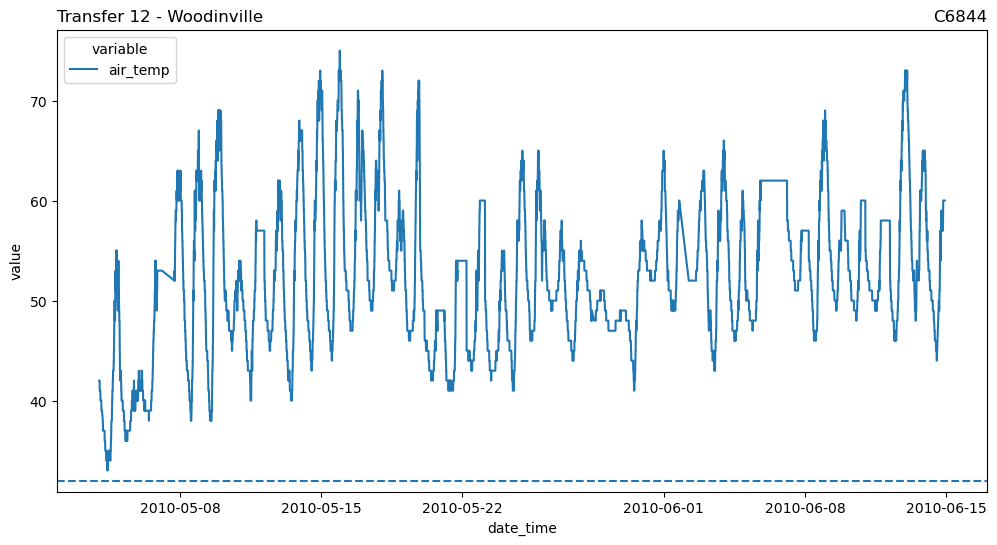

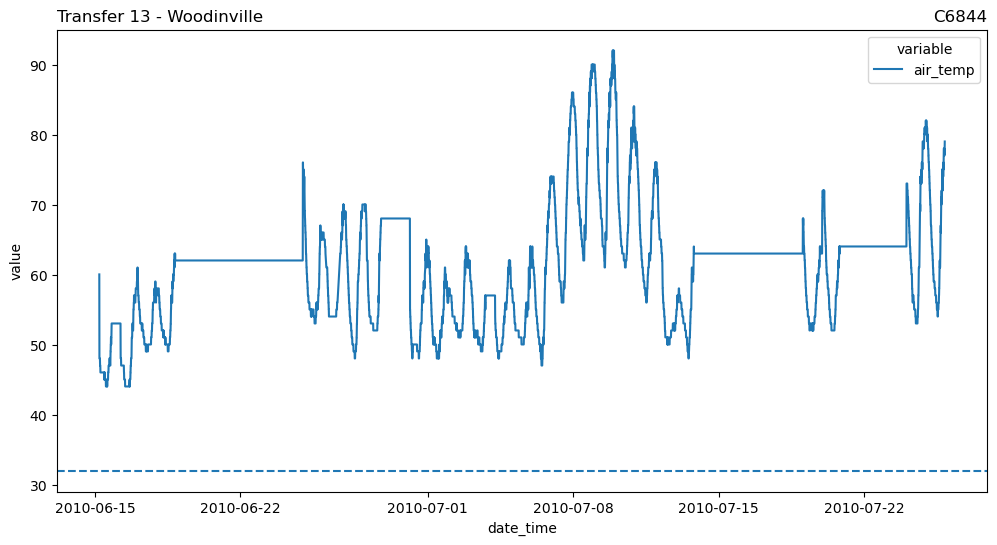

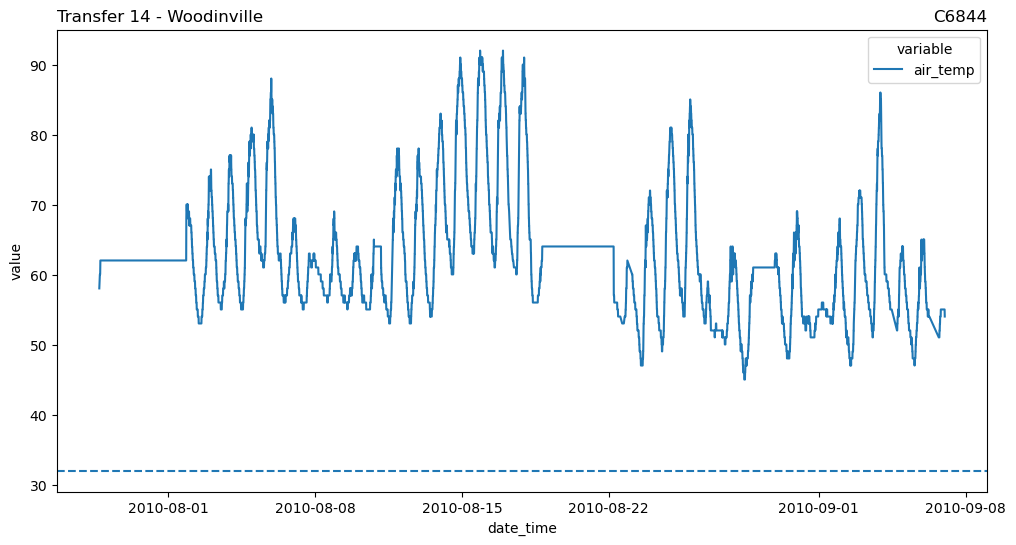

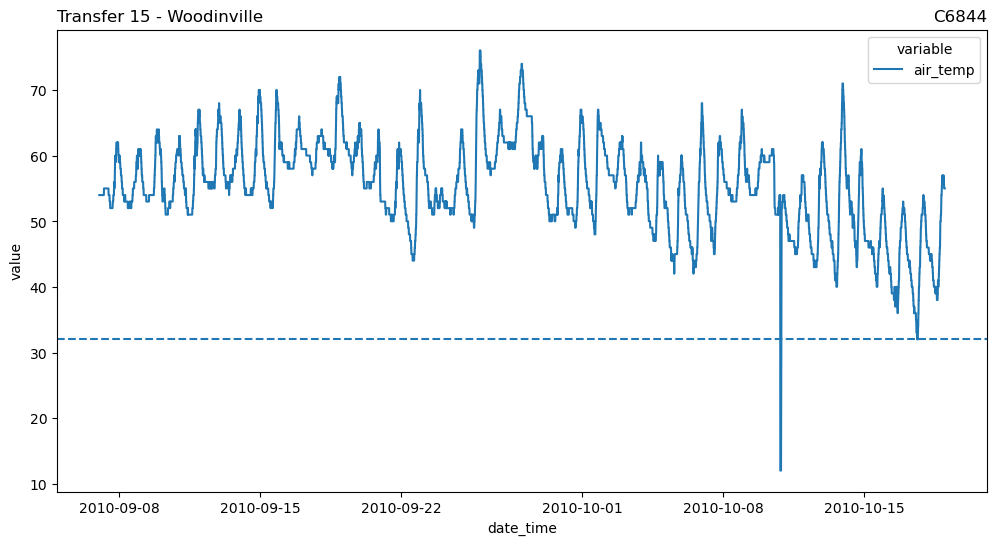

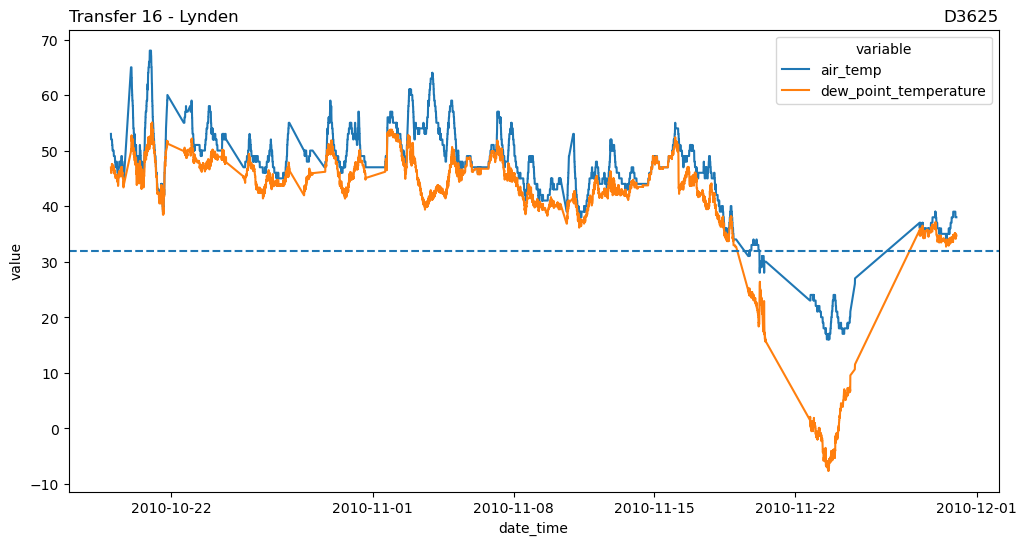

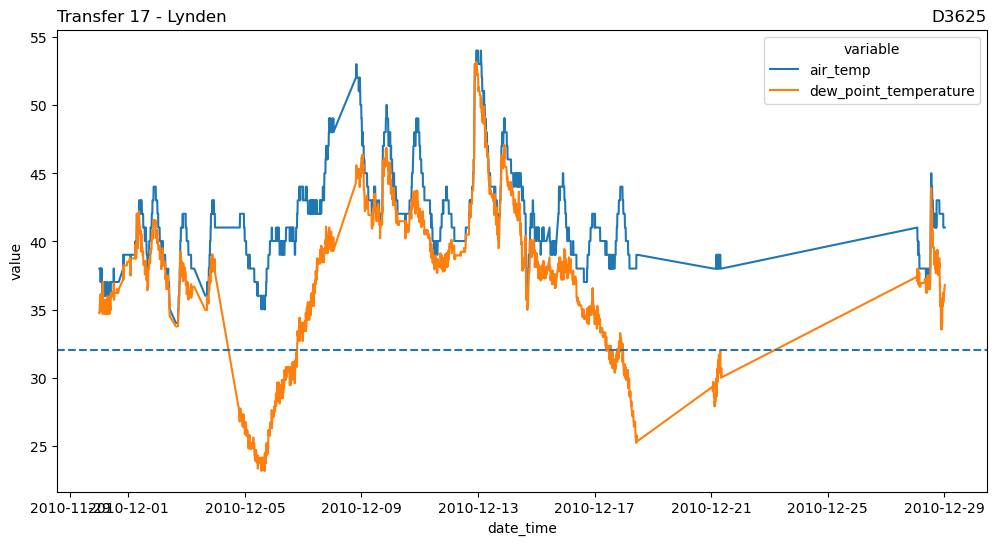

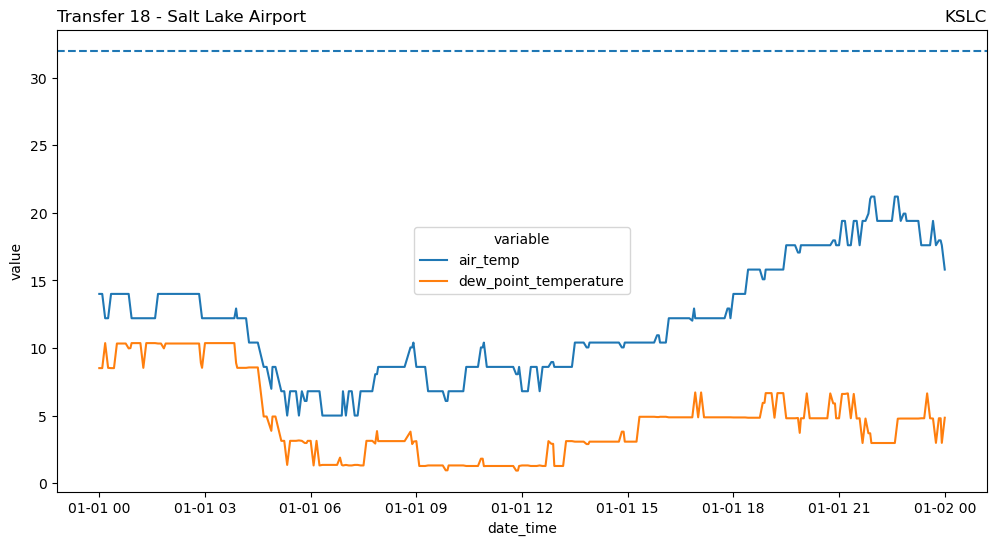

In [39]:
for a in transfers.iter_rows(named=True):
    # Break up timeseries into two parts to make a Synthetic API query
    half_transfer = half = (a["end"] - a["start"]) / 2
    x = []
    for start, end in zip(
        (a["start"], a["start"] + half_transfer),
        (a["start"] + half_transfer, a["end"]),
    ):
        x.append(
            TimeSeries(
                start=start,
                end=end,
                radius=(a["latitude"], a["longitude"], 10),
                vars="air_temp,dew_point_temperature",
                limit=1,
                units="english",
            ).df()
        )
    df = pl.concat(x)

    # Temperature
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(
        data=df.filter(pl.col("variable").is_in(["air_temp", "dew_point_temperature"])),
        # data=df.filter(pl.col("variable").is_in(["air_temp"])),
        x="date_time",
        y="value",
        hue="variable",
    )
    ax.set_title(f"Transfer {a['transfer']} - {a['area']}", loc="left")
    ax.set_title(df["stid"][0], loc="right")
    ax.axhline(32, color="tab:blue", linestyle="--")

## Total Precipitation

In [44]:
for a in transfers.head(1).iter_rows(named=True):
    pass
a

{'transfer': 0,
 'area': 'MTC',
 'start': datetime.date(2009, 1, 7),
 'end': datetime.date(2009, 1, 27),
 'latitude': 40.25937949117472,
 'longitude': -111.6441611325528}

🚚💨 Speedy delivery from Synoptic's precipitation service.
📦 Received data from 1 stations (0.56 seconds).
🚚💨 Speedy delivery from Synoptic's precipitation service.
📦 Received data from 1 stations (0.55 seconds).
🚚💨 Speedy delivery from Synoptic's precipitation service.
📦 Received data from 1 stations (0.63 seconds).
🚚💨 Speedy delivery from Synoptic's precipitation service.
📦 Received data from 1 stations (0.78 seconds).
🚚💨 Speedy delivery from Synoptic's precipitation service.
📦 Received data from 1 stations (0.61 seconds).
🚚💨 Speedy delivery from Synoptic's precipitation service.
📦 Received data from 1 stations (0.71 seconds).
🚚💨 Speedy delivery from Synoptic's precipitation service.
📦 Received data from 1 stations (0.70 seconds).
🚚💨 Speedy delivery from Synoptic's precipitation service.
📦 Received data from 1 stations (0.63 seconds).
🚚💨 Speedy delivery from Synoptic's precipitation service.
📦 Received data from 1 stations (0.50 seconds).
🚚💨 Speedy delivery from Synoptic's precipitati

/tmp/ipykernel_11628/2276331924.py:29: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(df["first_report"].min(), df["first_report"].max())


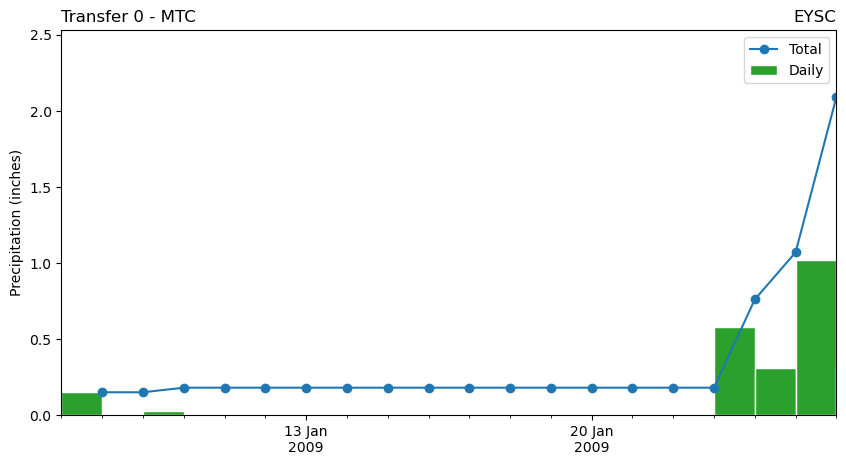

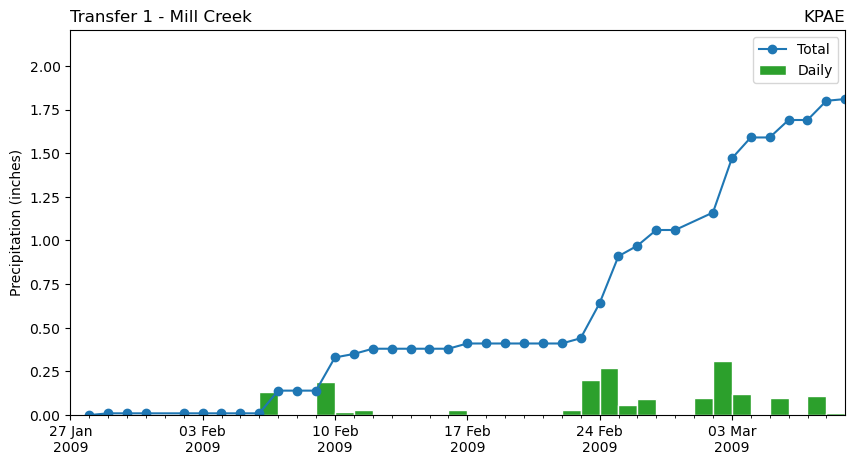

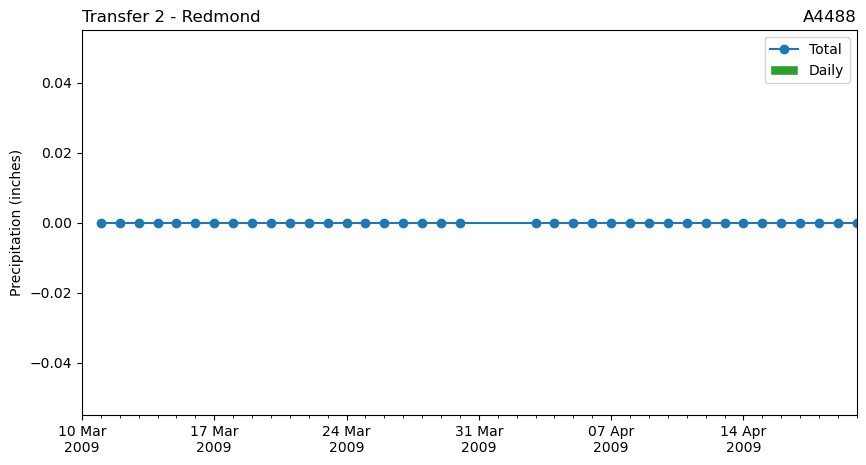

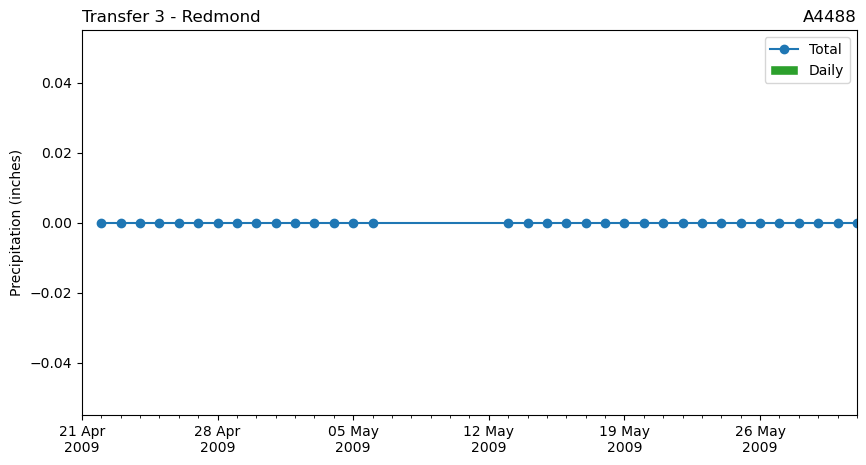

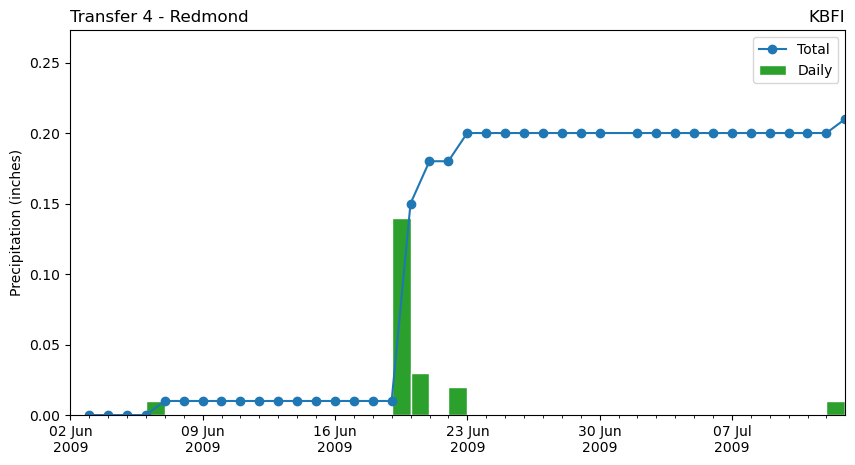

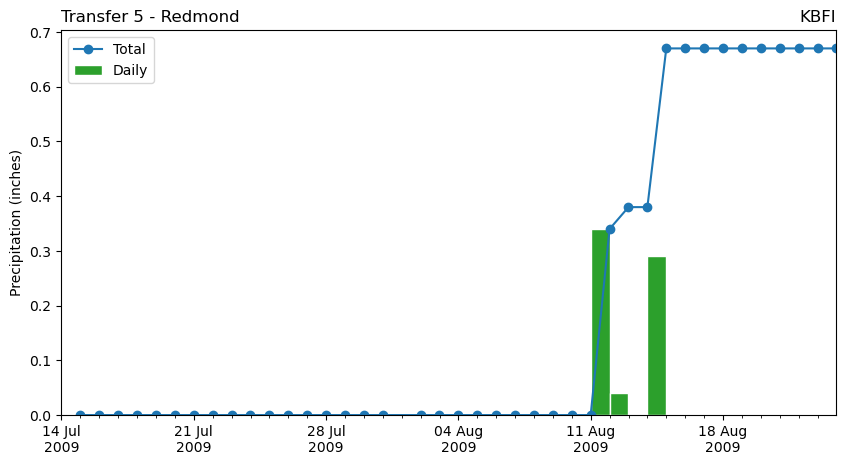

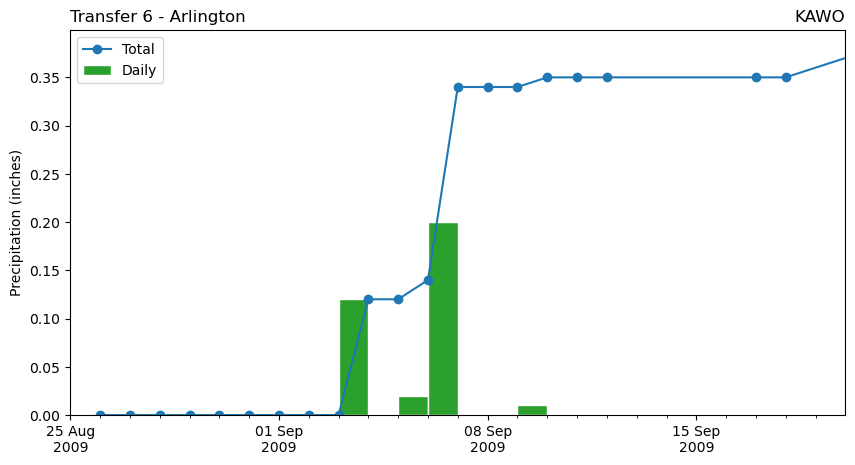

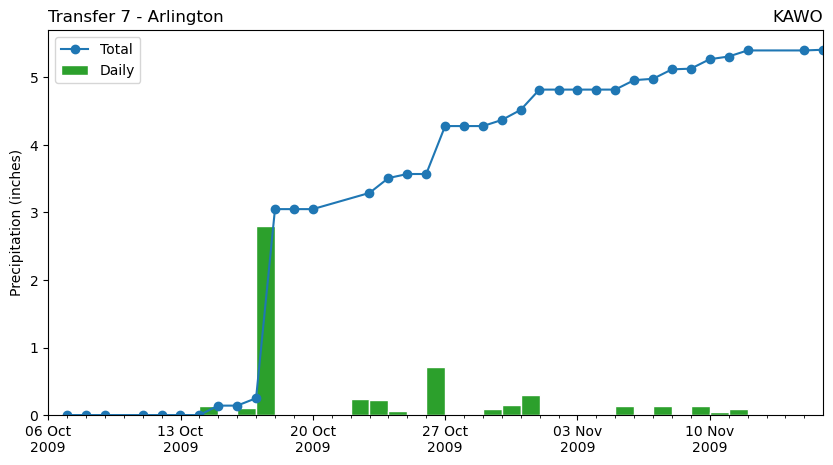

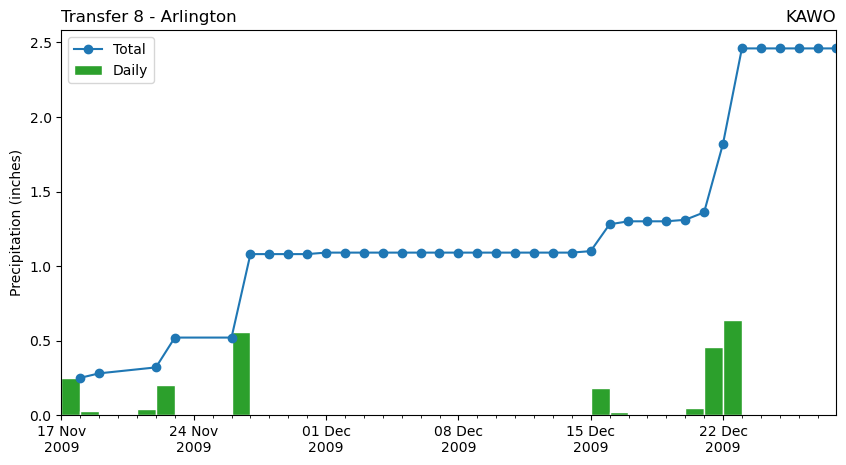

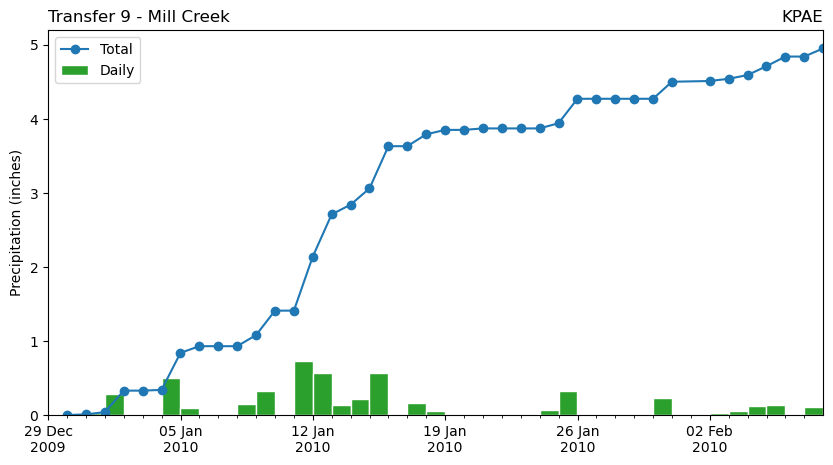

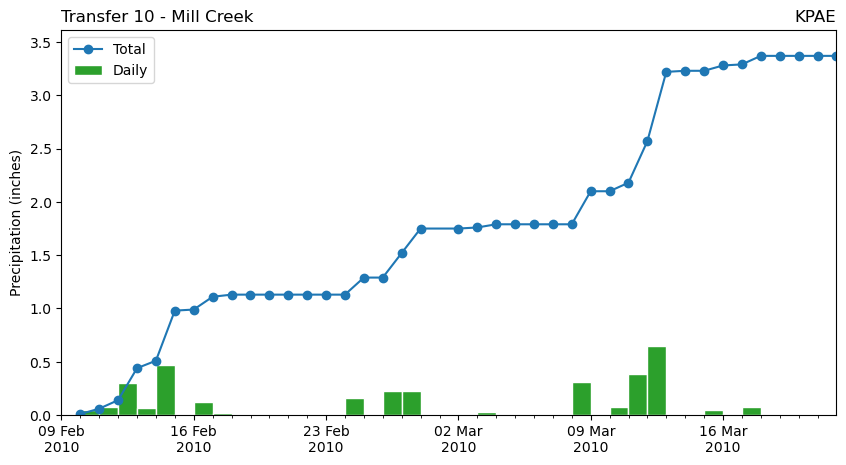

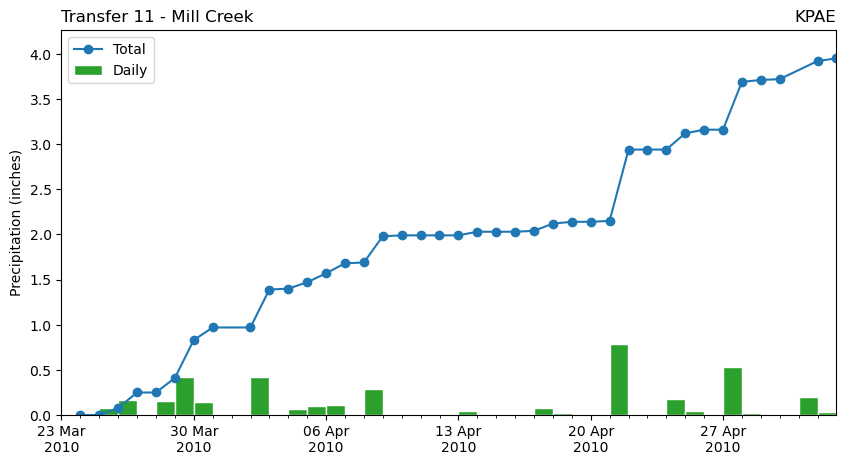

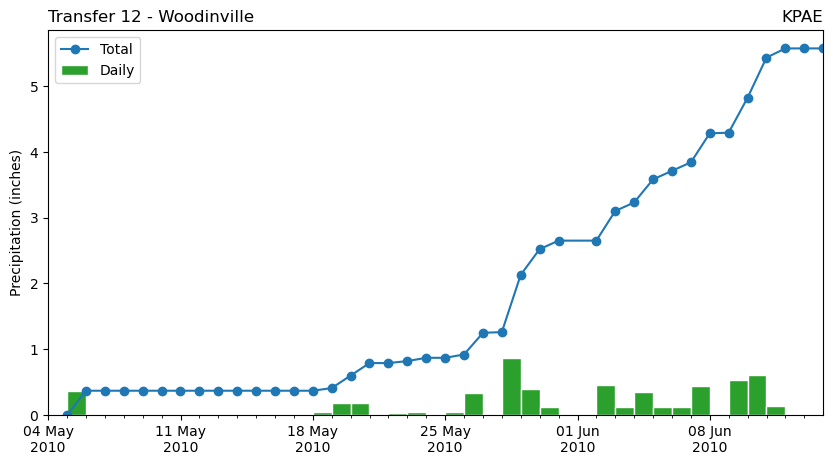

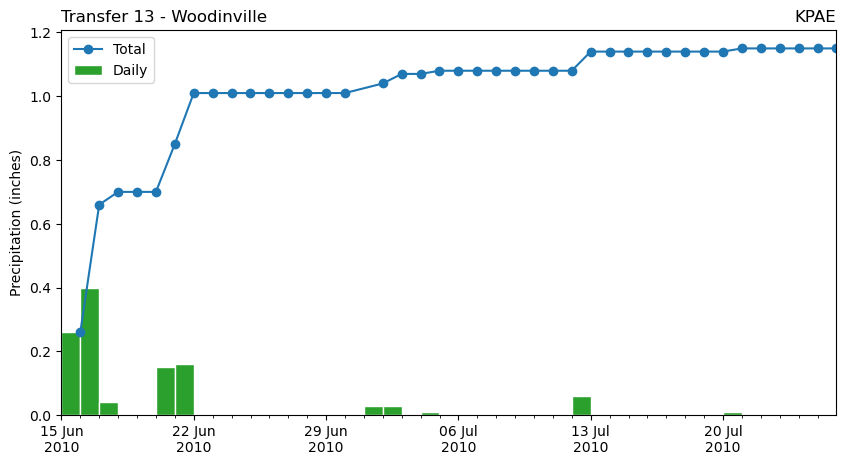

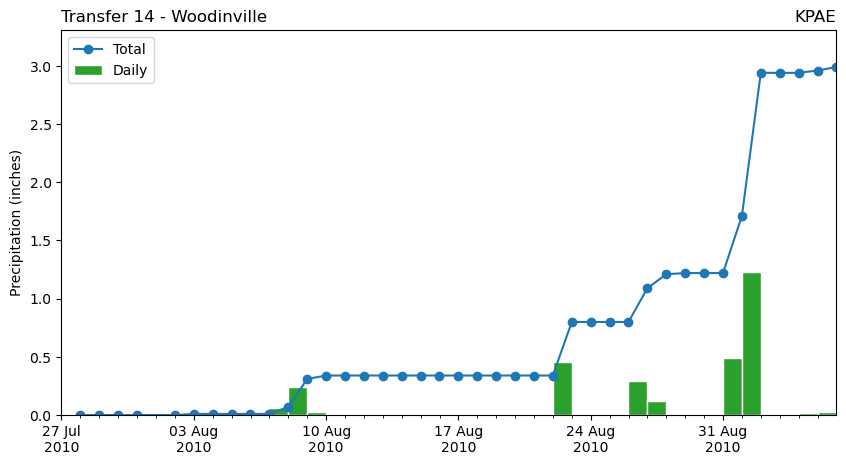

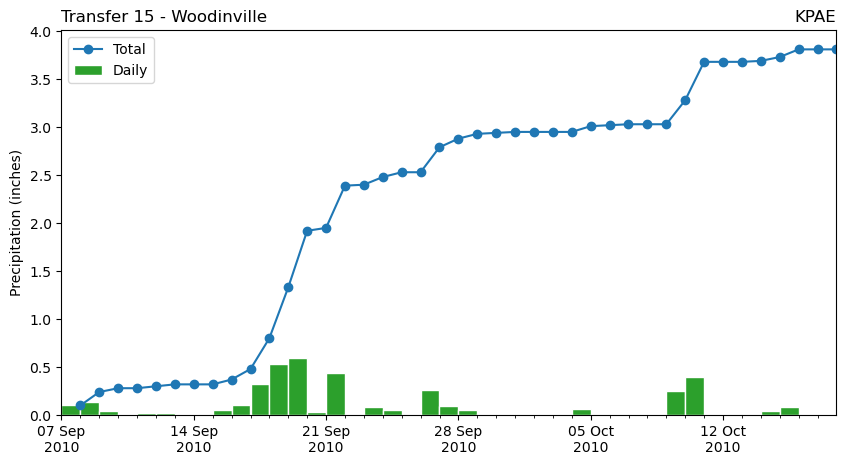

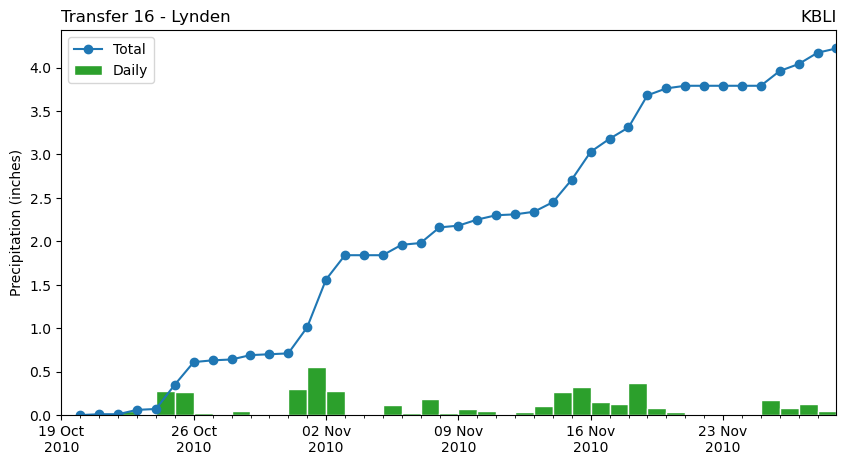

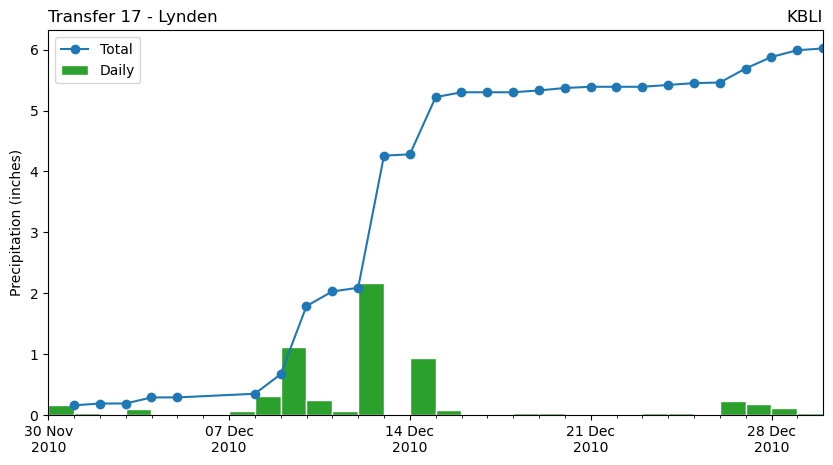

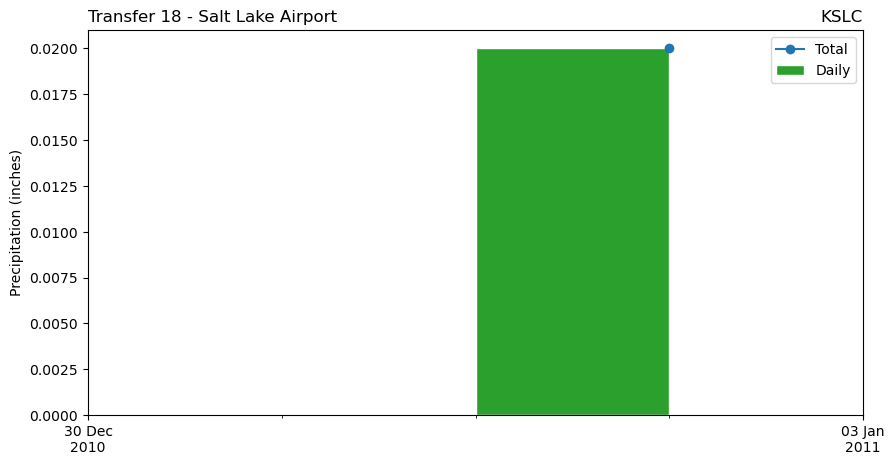

In [59]:
for a in transfers.iter_rows(named=True):
    df = Precipitation(
        start=a["start"],
        end=a["end"],
        radius=(a["latitude"], a["longitude"], 20),
        limit=1,
        pmode="intervals",
        interval="day",
        units="english",
    ).df()
    df = df.with_columns(cum_sum=pl.col("total").cum_sum())

    plt.figure(figsize=(10, 5))
    ax = plt.gca()

    ax.plot(df["last_report"], df["cum_sum"], marker="o", label="Total")
    ax.bar(
        df["first_report"],
        df["total"],
        width=timedelta(days=1),
        align="edge",
        edgecolor="w",
        color="tab:green",
        label="Daily",
    )
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b\n%Y"))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(1))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.set_xlim(df["first_report"].min(), df["first_report"].max())

    # ---------
    # Cosmetics
    ax.set_ylabel("Precipitation (inches)")
    ax.set_title(f"Transfer {a['transfer']} - {a['area']}", loc="left")
    ax.set_title(df["stid"][0], loc="right")
    ax.legend()